# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.236513e+01     9.190756e+00
 * time: 0.0019309520721435547
     1     3.129486e+01     5.504573e+00
 * time: 0.008505821228027344
     2     2.268316e+01     5.280567e+00
 * time: 0.015951871871948242
     3     2.035581e+01     5.230146e+00
 * time: 0.02347397804260254
     4     1.346650e+01     3.105884e+00
 * time: 0.030253887176513672
     5     1.085257e+01     1.171595e+00
 * time: 0.06789183616638184
     6     9.963056e+00     1.585691e+00
 * time: 0.07220888137817383
     7     9.566422e+00     8.391525e-01
 * time: 0.07641100883483887
     8     9.295706e+00     8.528453e-01
 * time: 0.08050394058227539
     9     8.986214e+00     7.776772e-01
 * time: 0.08470702171325684
    10     8.721448e+00     5.616259e-01
 * time: 0.08927202224731445
    11     8.531474e+00     5.193336e-01
 * time: 0.09468388557434082
    12     8.398332e+00     5.033804e-01
 * time: 0.10025286674499512
    13     8.360948e+00     7.188715e-01
 * 

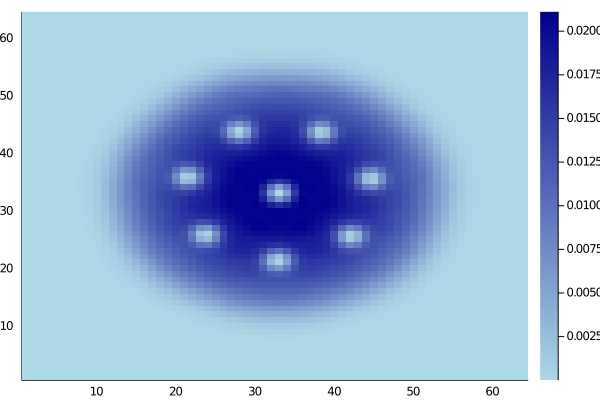

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)